<a href="https://colab.research.google.com/github/abubakarkhanlakhwera/Deepl-Learing/blob/main/Gradient_descent/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

**Gradient descent**




> **Gradient descent** is an optimization algorithm used to minimize a loss function by iteratively adjusting the parameters of a model in the direction that reduces the error. It is widely used in machine learning and deep learning to optimize model weights during training.



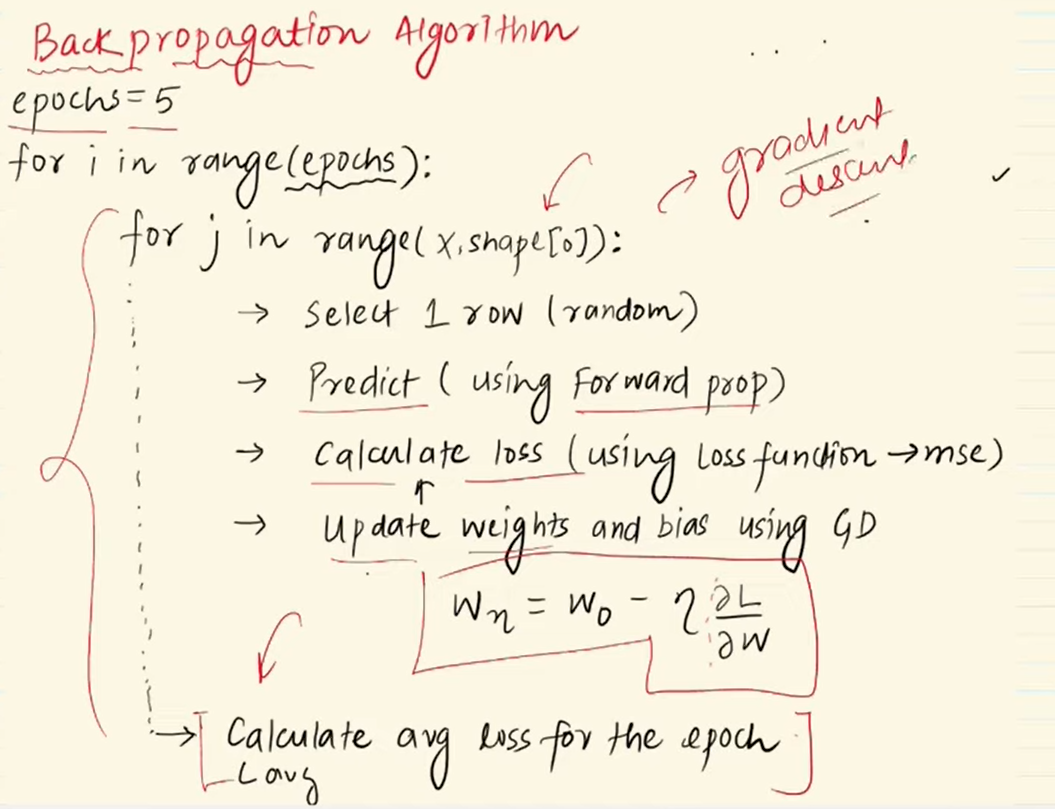

**Types of Gradient Descent**
- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent

# **1.Batch Gradient Descent (Vanila GD\Common)**


- **Description**: Uses the entire dataset to compute the gradient at each iteration.
- **Advantages**:
  - Converges smoothly due to precise updates.
  - Stable updates since it considers all data.
- **Disadvantages**:
  - Computationally expensive for large datasets.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df = df[['Age','EstimatedSalary','Purchased']]

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
X_scaled.shape

(400, 2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(320, 2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train,y_train,epochs=10,batch_size=320)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step - accuracy: 0.3781 - loss: 1085.6179
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3781 - loss: 874.5504
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3781 - loss: 721.4501
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3781 - loss: 593.1276
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3781 - loss: 479.0439
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3781 - loss: 374.2957
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3781 - loss: 288.7289
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3781 - loss: 211.9655
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3781 - loss: 138.2408
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3781 - loss: 66.9171
1.5135581493377686


In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=X_scaled.shape[0],validation_split=0.2)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step - accuracy: 0.8750 - loss: 0.2713 - val_accuracy: 0.9625 - val_loss: 0.2284
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8750 - loss: 0.2684 - val_accuracy: 0.9625 - val_loss: 0.2297
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8750 - loss: 0.2665 - val_accuracy: 0.9625 - val_loss: 0.2308
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8750 - loss: 0.2651 - val_accuracy: 0.9625 - val_loss: 0.2316
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8781 - loss: 0.2639 - val_accuracy: 0.9625 - val_loss: 0.2324
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8781 - loss: 0.2628 - val_accuracy: 0.9625 - val_loss: 0.2332
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8781 - loss: 0.2619 - val_accuracy: 0.9625 - val_loss: 0.2340
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8781 - loss: 0.2611 - val_accuracy: 0.9750 - val_loss: 0.234

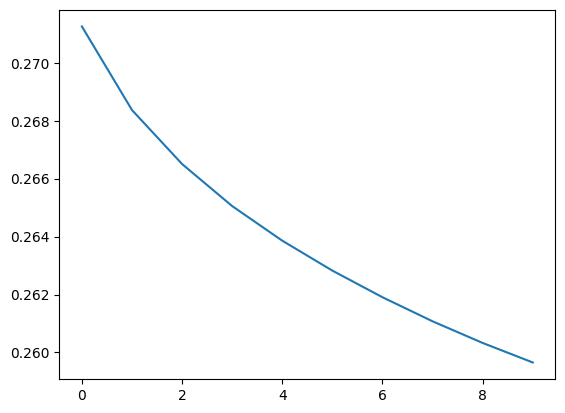

In [ ]:
plt.plot(history.history['loss'])

# **2.Stochastic Gradient Descent**


- **Description**: Updates the model parameters using the gradient computed from a single random data point.
- **Advantages**:
  - Fast updates due to smaller computations.
  - Can escape local minima due to noisy updates.
- **Disadvantages**:
  - Updates are noisy, leading to fluctuating convergence.
  - Might require more iterations to approach the optimum.

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train,y_train,epochs=10,batch_size=1)
print(time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4273 - loss: 51.2143
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4341 - loss: 39.7796
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4134 - loss: 37.7350
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4786 - loss: 37.5715
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 36.6603
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4956 - loss: 33.5381
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5326 - loss: 32.3536
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5023 - loss: 32.4786
Epoch 9/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5261 - loss: 34.4111
Epoch 10/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5353 - loss: 32.1903
6.850405693054199


In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8428 - loss: 0.3156 - val_accuracy: 0.9750 - val_loss: 0.2177
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9172 - loss: 0.2039 - val_accuracy: 0.9750 - val_loss: 0.2105
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9106 - loss: 0.2198 - val_accuracy: 0.9750 - val_loss: 0.2014
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.2950 - val_accuracy: 0.9750 - val_loss: 0.2008
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.2245 - val_accuracy: 0.9750 - val_loss: 0.1907
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8951 - loss: 0.2582 - val_accuracy: 0.9750 - val_loss: 0.1806
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9051 - loss: 0.2174 - val_accuracy: 0.9625 - val_loss: 0.1842
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8671 - loss: 0.2665 - val_accuracy: 0.

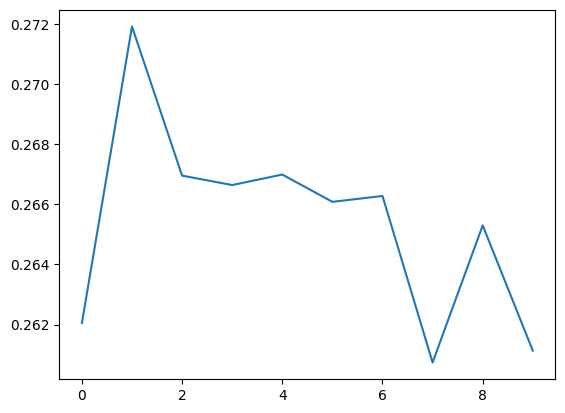

In [ ]:
plt.plot(history.history['loss'])


# **3.Mini-Batch Gradient Descent**

- **Description**: Uses a small batch of data (subset of the dataset) to compute the gradient.
- **Advantages**:
  - Combines the efficiency of SGD and the stability of batch gradient descent.
  - Well-suited for parallel computation on GPUs.
- **Disadvantages**:
  - Requires tuning of batch size for optimal results.
  - Slightly noisier than batch gradient descent.